In [79]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Text(0,0.5,'Count of occurences')

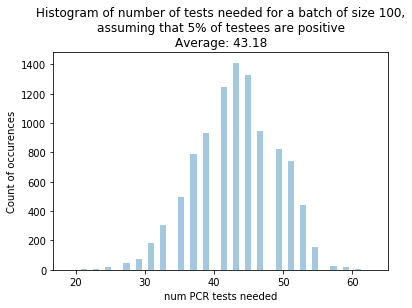

In [108]:
## N = testing batch size
N=100
## s = expected % carriers
s=0.05

### option to vary the % carrier
std_dev=s*0.10 
## I chose to make the standard deviation of the % carriers 10% of its value. Feel free to put more nuanced estimates



test_count_dist = []
count = 0
while count < 10000:
    if std_dev:
        s_normal = np.random.normal(s, std_dev)
        per_run_test_count = run_test(N, s_normal)
    else:
        per_run_test_count = run_test(N, s)
    test_count_dist.append(per_run_test_count)
    count +=1

sns.distplot(test_count_dist, kde=False)
plt.title("Histogram of number of tests needed for a batch of size {},\nassuming that {}% of testees are positive\nAverage: {}".format(N,int(s*100), np.round(np.average(test_count_dist), 2)))
plt.xlabel("num PCR tests needed")
plt.ylabel("Count of occurences")



In [102]:
s = 0.2

np.random.normal(0.2, .02, 20)

array([ 0.20233746,  0.16936221,  0.20268431,  0.20417294,  0.21166253,
        0.19919685,  0.22698124,  0.19171324,  0.23674902,  0.2185014 ,
        0.19648461,  0.20134567,  0.17584292,  0.18515405,  0.21414403,
        0.19113961,  0.22881906,  0.21198061,  0.22458879,  0.17299566])

In [72]:
## Randomly assign members in our batch as positive or negative
def run_test(N, s):
    test_batch = np.zeros(N, dtype=int)
    test_batch[:int(N*s)]  = 1
    np.random.shuffle(test_batch)
    num_tests = test_all(test_batch, 0)
    return num_tests


In [73]:
## this function will simulate a test where first you combine all the samples, then
## in the case where you have a positive hit, you break the sample in half and re-do 
## the test, until you have classified definitely each sample as positive or negative

def test_all(test_batch, round_num):
#     print(test_batch, round_num)
    ##no tests on an empty array
    if len(test_batch) == 0:
        return round_num
    
    ## if all the tests are negative, no further testing needing
    elif is_negative(test_batch):
        return round_num + 1
    
    ## if the sample size is one, and the test is positive, no further testing needed
    elif len(test_batch) == 1:
        return round_num + 1
    
    ## else, split batch in two and test
    else:
        halfway = int(len(test_batch) / 2)
        first_half_rounds = test_all(test_batch[:halfway], round_num)
        second_half_rounds = test_all(test_batch[halfway:], round_num)
        return first_half_rounds + second_half_rounds + 1

    
## simulates a negative result which corresponds to seeing no florescence in the PCR 
def is_negative(arr):
    if sum(arr) == 0:
        return True
    else:
        return False

In [66]:
## quality testing 

arr = []
print(bool(test_all(np.asarray(arr), 0) == 0))

arr = [0]
print(bool(test_all(np.asarray(arr), 0) == 1))

arr = [0,0]
print(bool(test_all(np.asarray(arr), 0) == 1))

arr = np.zeros(10, dtype=int)
print(bool(test_all(np.asarray(arr), 0) == 1))

arr = [1,0]
print(bool(test_all(np.asarray(arr), 0) == 3))

arr = [1,1]
print(bool(test_all(np.asarray(arr), 0) == 3))


arr = [1,1,0]
print(bool(test_all(np.asarray(arr), 0) == 5))

arr = [1,1,1]
print(bool(test_all(np.asarray(arr), 0) == 5))


arr = [0,1,1]
print(bool(test_all(np.asarray(arr), 0) == 5))

arr = [0,0,1]
print(bool(test_all(np.asarray(arr), 0) == 5))

arr = [1,0,0]
print(bool(test_all(np.asarray(arr), 0) == 3))


arr = [1,0,0,0]
print(bool(test_all(np.asarray(arr), 0) == 5))

arr = [0,0,0,0,1,0,0]
print(bool(test_all(np.asarray(arr), 0) == 7))

arr = [1,0,0,0,1,0,0]
print(bool(test_all(np.asarray(arr), 0) == 9))

arr = [1,1,1,1,1,1]
print(bool(test_all(np.asarray(arr), 0) == 11))


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


array([], dtype=float64)

0